# Seaborn 初级

**导语**

> seaborn是python里面做数据分析和机器学习常用的可视化库。它对matplotlib进行了深度封装，从而可以用非常简单的api接口绘制相对复杂的图形，提供对数据的深入认识。

**介绍**

在这个 Seaborn 简介中，将学习如何使用 Python 最方便的库之一来进行数据可视化。

对于那些曾经使用过 Matplotlib 的人来说，你可能想知道，为什么需要10行代码才能制作出像样的直方图？

如果你正在寻找一个更简单的方式来绘制有吸引力的图表，那么你会爱上 Seaborn。

Seaborn 为 Matplotlib 提供了一个高级接口，Matplotlib 是一个功能强大但有时很笨重的 Python 可视化库。

Seaborn 的官方网站表示：

> 如果 matplotlib “试图使简单的事情保持简单, 困难的事情成为可能”，seaborn 试图让一套明确定义的困难事情变得容易。

这是对 Seaborn 强项的不错总结。在实践中，“一套明确定义的困难事情”包括：

* 使用美观的默认主题
* 设置自定义调色板
* 制作有吸引力的统计图
* 轻松灵活的显示分布
* 可视化来自矩阵和 DataFrame 的信息

最后三点就是为什么 Seaborn 是我们探索性分析的首选工具。这使得快速高效地“了解”数据非常容易。

然而，Seaborn 是 Matplotlib 的补充，而不是替代品。还有一些特殊设置仍然需要 Matplotlib。

## 1. 导入数据

[数据下载](https://elitedatascience.com/wp-content/uploads/2017/04/Pokemon.csv)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns

%matplotlib inline

In [3]:
# Read dataset
df = pd.read_csv('data/Pokemon.csv', index_col=0, encoding='utf-8')
df.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte

In [8]:
df.shape

(151, 12)

## 2. Seaborn 的画图方法

Seaborn 最大的优势之一是其多样的绘图功能。例如，制作散点图只需要一句 lmplot() 即可.

有两种方法可以做到这一点:

* 第一种方法（推荐）是将你的 DataFrame 传递给 data =，同时将列名传递给轴参数，x = 和 y =。
* 第二种方法是直接将一系列数据传递给轴参数。

例如，我们来比较我们的”神奇宝贝”的攻击和防御统计：

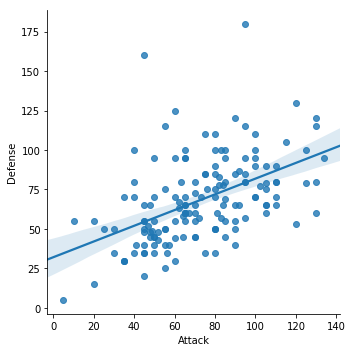

In [3]:
# Recommended way
sns.lmplot(x='Attack', y='Defense', data=df)
 
# Alternative way
# sns.lmplot(x=df.Attack, y=df.Defense)

Seaborn 没有专门的散点图函数，这就是为什么你看到一条对角线。我们实际上使用了 Seaborn 拟合和绘制回归线的函数。

不过，每个绘图方法都有几个有用的选项。我们可以设置一下 lmplot()：

* 首先，设置 fit_reg = False 来移除回归线，因为我们只需要一个散点图。
* 然后，设置 hue ='Stage' 根据神奇宝贝的进化阶段着色。这个 hue 参数非常有用，因为它允许你使用颜色表示第三维信息。

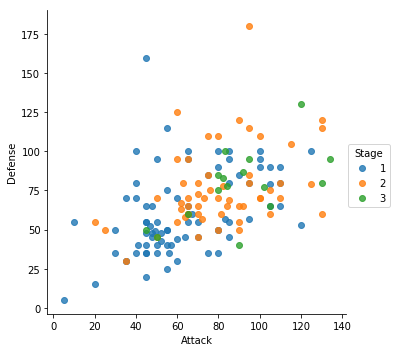

In [4]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

漂亮多了吧? 如果我们想改变坐标轴范围呢?

## 3. 使用 Matplotlib 做自定义

记住，Seaborn 是 Matplotlib 的高级接口。Seaborn 将会为您提供大部分解决方法，但有时你也需要 Matplotlib 的帮助。

设置坐标轴范围就是其中一个例子：

* 首先，照常调用你的 Seaborn 绘图方法。
* 然后，调用 Matplotlib 的自定义函数。在这个例子中，我们将使用它 ylim()和 xlim()。

(-10, 141.9881096001028)

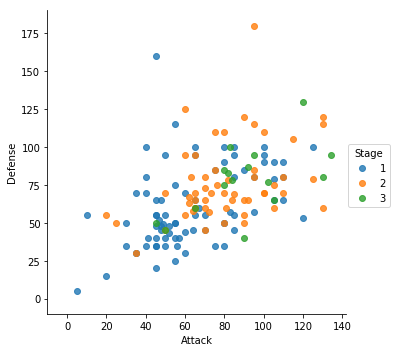

In [7]:
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(-10, None)
plt.xlim(-10, None)

## 4. Pandas 的作用

尽管这是 Seaborn 教程，但 Pandas 实际上扮演着非常重要的角色。如果能够合理使用 DataFrame, Seaborn 会更加好用。

假设为神奇宝贝的战斗统计量绘制 box plot

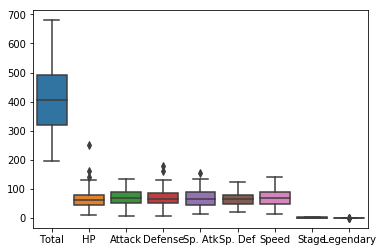

In [9]:
# Boxplot
sns.boxplot(data=df)

这是个说得过去的开始，但是我们可能希望删除一些列：

* 我们可以删除 Total，因为数据有单独统计。
* 我们可以移除 Stage 和 Legendary，因为它们不是战斗统计。

不过 Seaborn 来做这些可不容易。相反，DataFrame 做起来很简单。

让我们创建一个名为 stats_df 的新 DataFrame，它只保留统计信息列:

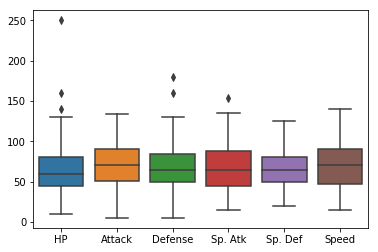

In [10]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

## 5. Seaborn 主题风格

Seaborn 的另一个优点是它带来了优雅的风格主题。

接下来，制作 violin plot 并将主题更改为 “darkgrid”。

* violin plot 是 box plot 的良好替代品。
* 它能显示分布（通过小提琴的宽度），而不是仅汇总统计。

例如，我们可以看到神奇宝贝主要类型的攻击分布：

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

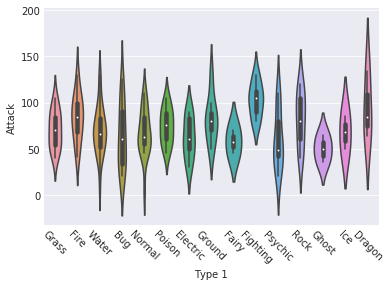

In [23]:
# Set theme
sns.set_style('darkgrid')
 
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)

plt.xticks(rotation=-45)

正如你所看到的，Dragon 比 Ghost 更具攻击性，但它们也有更大的差异。

## 6. 更多

### 6.1 Heatmap

查看矩阵数据

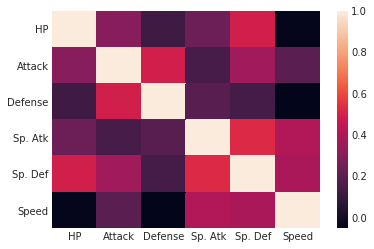

In [12]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr)

### 6.2 Histogram

查看离散数据分布

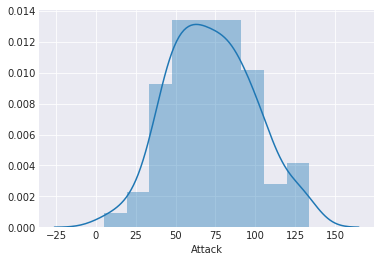

In [13]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

### 6.3 Bar Plot

查看范畴数据分布

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

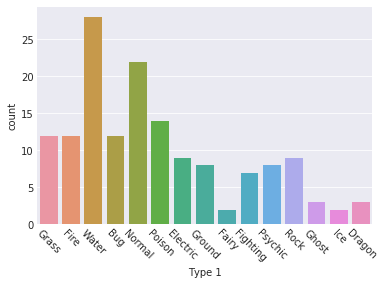

In [17]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=None)
 
# Rotate x-labels
plt.xticks(rotation=-45)

### 6.4 Factor Plot

根据种类分别绘图

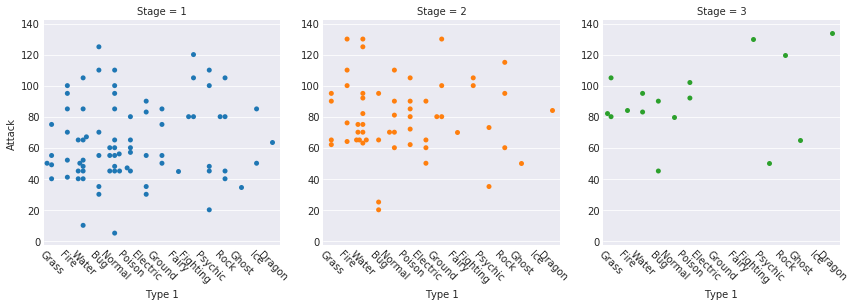

In [24]:
# Factor Plot
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

### 6.5 Joint Distribution Plot

联合分布, 查看二维数据

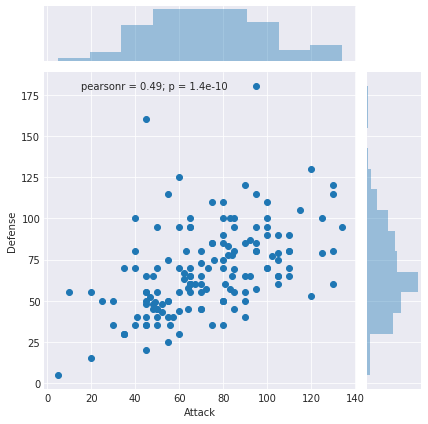

In [25]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)

现在你已经了解了 Seaborn 基础, 下一步可以边做边学了.

# Seaborn 高级

有了前面 seaborn 的基础, 这里对它进行一些深入介绍, 并分析在什么时候应该使用什么图.

seaborn 本身建立在 Matplotlib 之上, 它自己也有低级方法和高级方法. 低级方法直接使用 Matplotlib 操作数值数据, 范畴数据和回归. 高级方法调用低级方法绘图, 可以更快速的画图. 如果想要更多的画图自主性, 那么还是要用低级方法. 当然, 最高的自主性就是直接使用 Matplotlib, 但是比较费事.

这个层级关系可以参考下图

![seaborn.png](attachment:seaborn.png)

结合上面层级关系, 看下面的脑图会有一个更全面的映像:

![mindmap.png](attachment:mindmap.png)

## 1. Visualizing the distribution of a dataset

这里介绍绘制数值数据分布图的方法:

* 单变量: displot 绘制直方图和概率密度曲线
* 双变量: jointplot 绘制联合概率
* 成对关系: pairplot 绘制数据的成对关系

In [27]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [28]:
np.random.seed(sum(map(ord, "distributions")))
sns.set(color_codes=True)

## 2. 绘制单变量分布 Plotting univariate distributions

快速查看 seaborn 中单变量分布的最便捷方法是 distplot() 函数。默认情况下，绘制直方图并拟合核密度估计值（kernel density estimate, KDE).

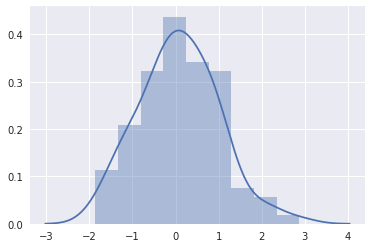

In [29]:
x = np.random.normal(size=100)
sns.distplot(x);

## 3. 直方图 Histograms

让我们删除密度曲线并添加一个 rug plot (地毯图)，这个图对每次观测值绘制一个小的垂直刻度。你可以用 rugplot() 函数直接绘制地毯图，但是它也可以在 distplot() 中使用：

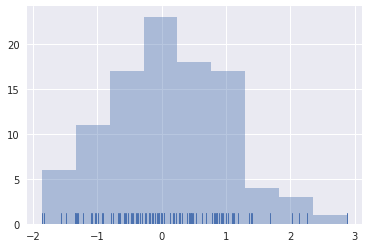

In [30]:
sns.distplot(x, kde=False, rug=True);

## 4. Kernel density estimaton (核密度估计, KDE)

大家可能不熟悉核密度估计，但它可能是绘制分布形状的有用工具。就像直方图一样，KDE 图将一个轴上的观测密度与另一个轴上的高度进行编码：

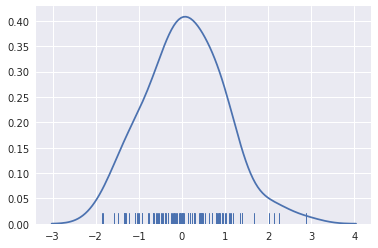

In [31]:
sns.distplot(x, hist=False, rug=True);

## 5. 绘制二元变量分布 Plotting bivariate distributions

可视化两个变量的二元分布也很有用。在 seaborn 中最简单的方法是使用 jointplot() 函数，该函数创建一个多面板图形，在每个轴上显示两个变量之间的二元（或联合）关系以及单变量（或边际）分布。

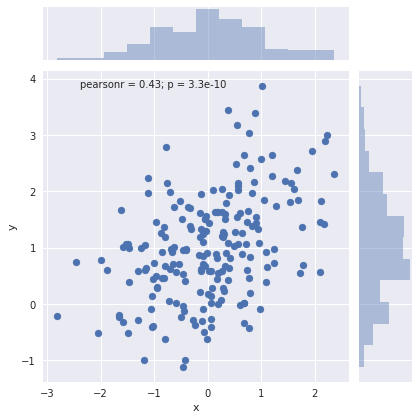

In [32]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

sns.jointplot(x="x", y="y", data=df)

## 6. 可视化数据集中的成对关系 Visualizing pairwise relationships in a dataset

要在数据集中绘制多个成对的双变量分布，可以使用 pairplot() 函数。这将创建一个矩阵并显示 DataFrame 中各个列的成对关系。默认情况下，它也绘制每个变量在对角轴上的单变量分布

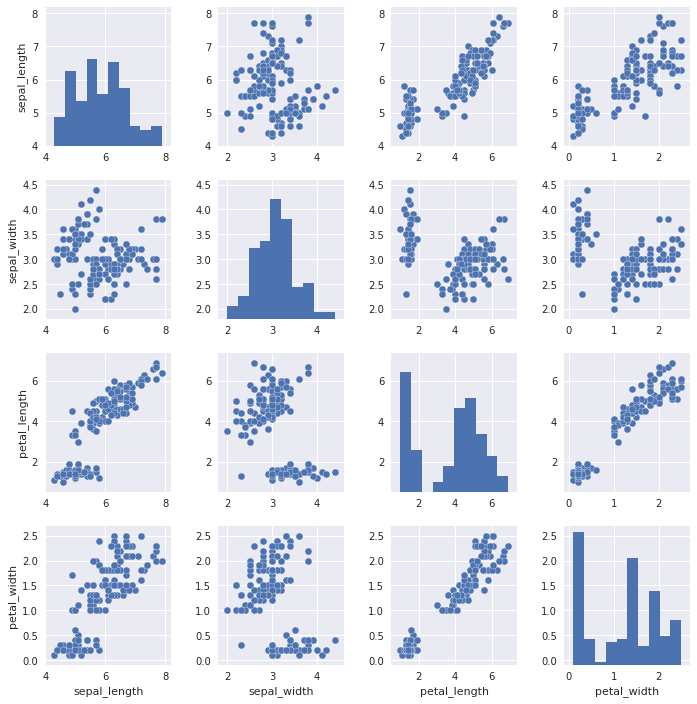

In [33]:
iris = sns.load_dataset("iris")
# 如果数据不能载入， 下载数据然后读入: https://github.com/mwaskom/seaborn-data
# iris = pd.read_csv('data/iris.csv')
sns.pairplot(iris)

## 7. 绘制范畴数据(分类数据)Plotting with categorical data

这部分介绍如何绘制范畴数据

可以将 seaborn 的范畴图分为三类

* 显示分类变量的每个级别的每个观察结果：swarmplot（）和stripplot（）
* 显示每个观测分布的抽象表示：boxplot（）和violinplot（）
* 应用统计估计来显示集中趋势和置信区间的度量：barplot（）和pointplot（）

尽管每个 API 都有特定的参数来控制应用于该数据的可视化的细节, 不过这些函数共享一个基本的 API 来接收数据.

上面提到的函数都是低级函数，因为它们绘制在特定的 matplotlib 轴上。

还有更高级别的 factorplot()，它将这些函数与 FacetGrid 结合起来，在图形面板的**网格上绘制分类图**。

In [34]:
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))
# titanic = pd.read_csv('data/titanic.csv')
# tips = pd.read_csv('data/tips.csv')
# iris = pd.read_csv('data/iris.csv')
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

## 8. 散点图 Categorical scatterplots

显示某个变量的值在一个级别上的值可以使用 stripplot()，它将散点图推广到其中一个变量是范畴数据的情况：

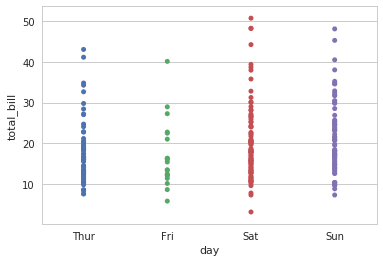

In [35]:
sns.stripplot(x="day", y="total_bill", data=tips);

在条状图中，散点图通常会重叠。这使得很难看到数据的完整分布。一个简单的解决方案是使用一些随机的“抖动(jitter)”来调整位置（仅沿分类轴）：

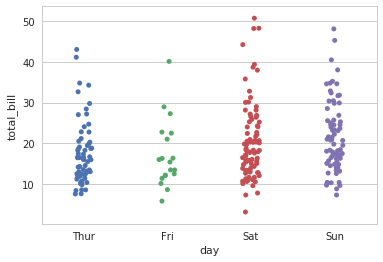

In [36]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True);

一种不同的方法是使用函数 swarmplot()，它使用点避免重叠的算法将每个散点图分布在分类轴上：

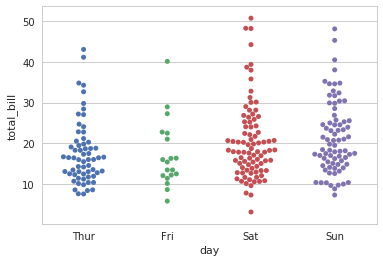

In [37]:
sns.swarmplot(x="day", y="total_bill", data=tips);

也可以用 hue 参数添加一个嵌套的分类变量：

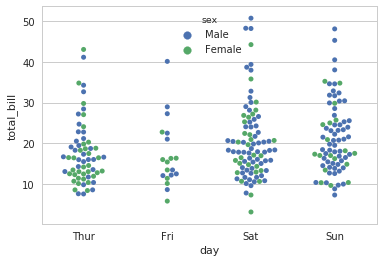

In [38]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips);

有时候，将分类变量放在垂直轴上可能更好（当类别名称相对较长或有很多类别时，这是非常有用的）。可以使用 orient 关键字设定一个方向，但通常可以通过传递给 x 和 y 变量的数据类型来推断绘图方向：

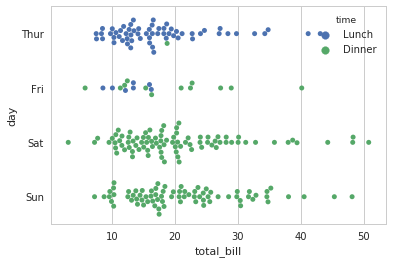

In [39]:
sns.swarmplot(x="total_bill", y="day", hue="time", data=tips);

## 9. 分类内数据的分布 Distributions of observations within categories
有时候，散点图提供的信息很有限。有几种方法可以通过各种方式对这些信息进行总结，以便在整个类别级别进行比较。

### 9.1 Boxplots

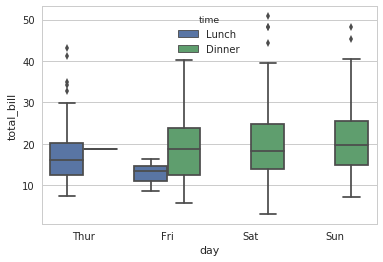

In [40]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

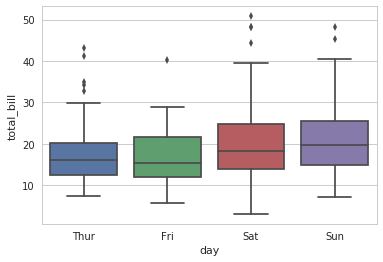

In [41]:
sns.boxplot(x="day", y="total_bill", data=tips);

### 9.2 Violinplots

另一种方法是violinplot()，它将 boxplot 与核密度估计相结合：

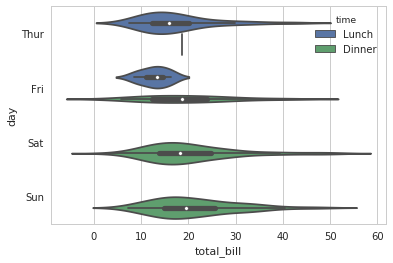

In [42]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips);

当 hue 参数只有两个等级时，也可以“拆分”小提琴，这样可以更有效地利用空间：

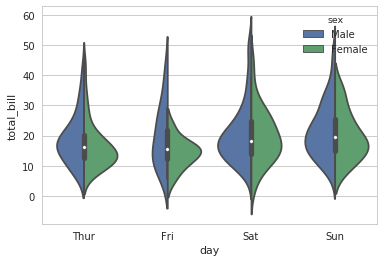

In [43]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True);

## 10. 统计估计 Statistical estimation within categories

很多时候，想要展示这些数值的集中趋势，而不是显示每个类别中的分布情况。 Seaborn 主要有两种显示这些信息的方式

### 10.1 Bar plots

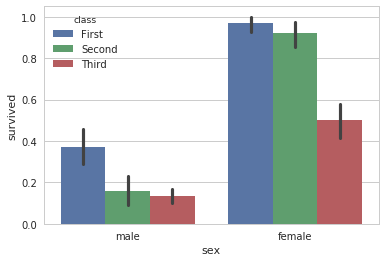

In [44]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

当你想显示每个类别的观察数量而不是比例时, 可以使用 countplot()：

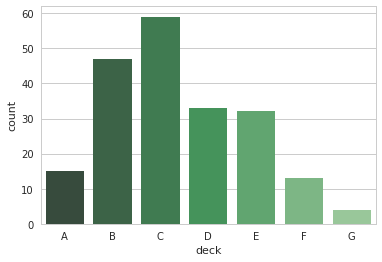

In [45]:
sns.countplot(x="deck", data=titanic, palette="Greens_d");

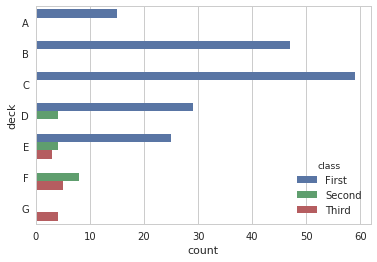

In [46]:
sns.countplot(y="deck", hue="class", data=titanic);

### 10.2 Point plots

pointplot() 函数提供了查看相同信息的另一种方式。此函数也会将 y 轴上的高度值编码，但不是显示完整的柱形图，而是绘制点估计值和置信区间。另外，pointplot 连接相同“色调(hue)”的点。这可以很容易地看出 y 随 x 的变化.

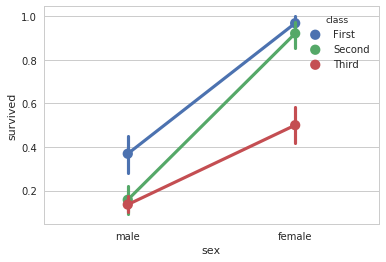

In [47]:
sns.pointplot(x="sex", y="survived", hue="class", data=titanic);

## 11. 绘制多面板图Drawing multi-panel categorical plots

正如我们上面提到的，有两种方法可以绘制 seaborn 分类图。可以使用上面介绍的函数，或者使用将这些函数与 FacetGrid() 结合起来的高级函数 factorplot()。默认情况下，factorplot() 生成一个 pointplot()：

### 11.1 factorplot and FacetGrid

seaborn 的一大能力就是很容易画条件图

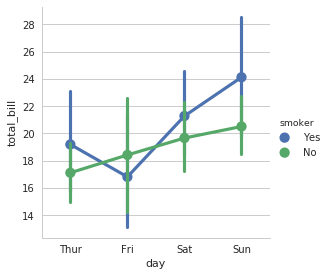

In [48]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips);

kind 参数可以让你选择上面讨论的任何一种图：

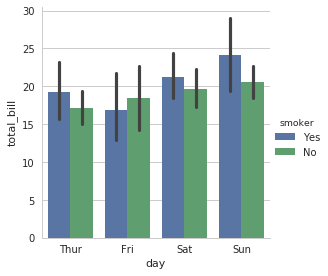

In [49]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar");

使用 factorplot() 的主要优点是可以很容易地绘图并调查其他分类变量的作用：

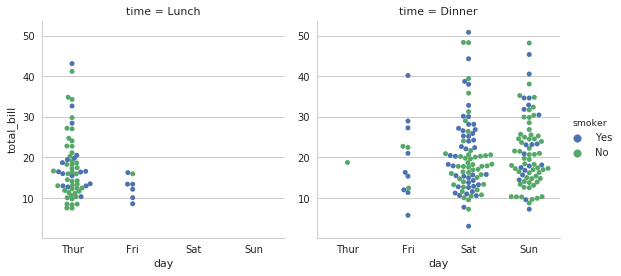

In [50]:
sns.factorplot(x="day", y="total_bill", hue="smoker",
               col="time", data=tips, kind="swarm");  # 根据时间不同, 分布在不同列

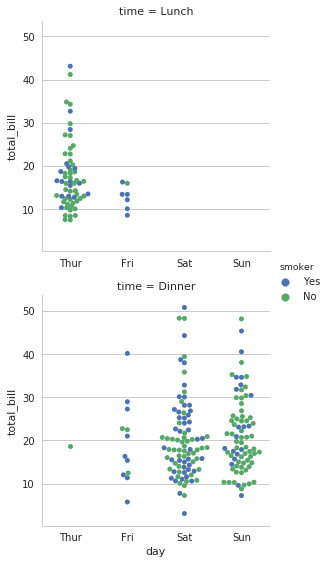

In [51]:
sns.factorplot(x="day", y="total_bill", hue="smoker",
               row="time", data=tips, kind="swarm");  # 根据时间不同, 分布在不同行

我们可以绘制任何类型的图。由于 FacetGrid 的工作方式，要改变图形的大小和形状，需要指定每个子图的 size 和 aspect 参数：

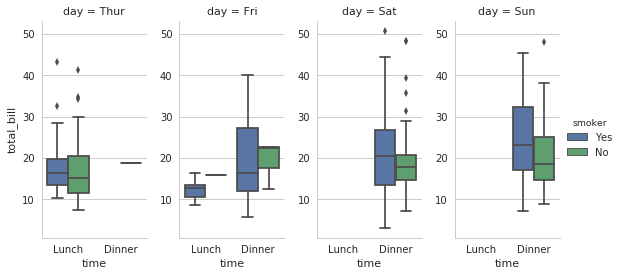

In [52]:
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5)

factorplot 一大好处是可以一次完成所有工作，而不必自己分割数据并单独创建条件图。

FacetGrid 对象稍微复杂一点，但也更强大，采取同样的想法。假设我们想看KDE图：

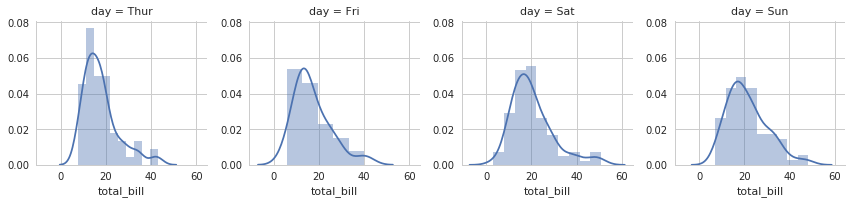

In [53]:
g = sns.FacetGrid(data=tips, col="day")  # 建立 FacetGrid 对象, 以 day 为分类画在几个列上
g.map(sns.distplot, "total_bill")  # 使用 FacetGrid 对象方法 map(绘图方法, 数据) 绘图

In [54]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


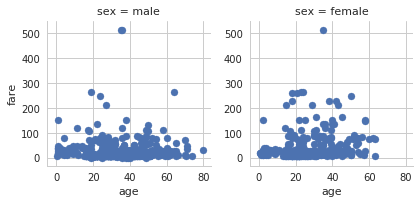

In [55]:
g = sns.FacetGrid(data=titanic, col="sex") 
g.map(plt.scatter, "age", "fare")

FacetGrid 让我们可以将任何绘图功能映射到数据的每个部分。例如，上面我们将 plt.scatter 赋予 g.map，它告诉 Seaborn 将 matplotlib plt.scatter 函数应用于每段数据。我们可以使用任何理解输入数据的函数。例如，我们可以绘制回归图：

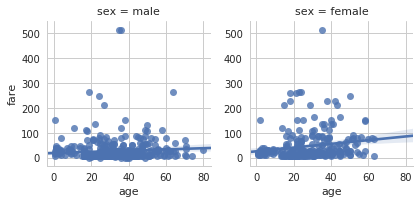

In [56]:
g = sns.FacetGrid(titanic, col="sex") 
g.map(sns.regplot, "age", "fare") 

我们甚至可以一次分割多个变量，一些沿着行分布, 一些沿着列分布。这对于比较条件分布非常有用：

/home/miaopei/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color'
  s)


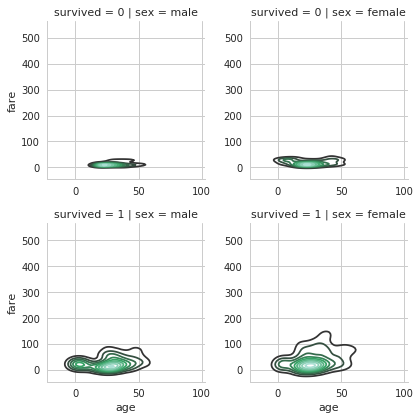

In [57]:
g = sns.FacetGrid(titanic, col="sex", row="survived") 
g.map(sns.kdeplot, "age", "fare") 

### 11.2 pairplot and PairGrid

PairGrid 可以帮助显示数个变量的分类关系, 用法和 FacetGrid 类似：

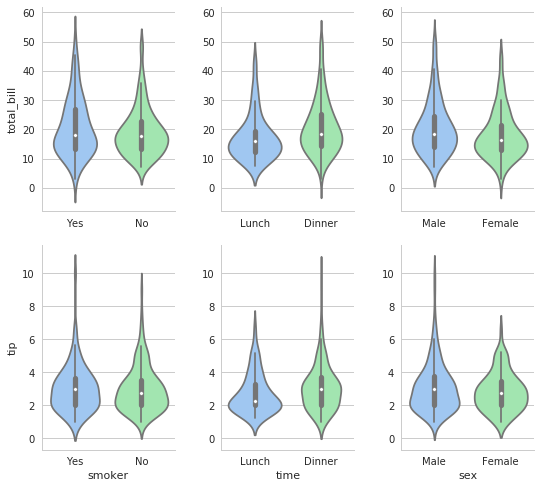

In [58]:
g = sns.PairGrid(tips,
                 x_vars=["smoker", "time", "sex"],
                 y_vars=["total_bill", "tip"],
                 aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");

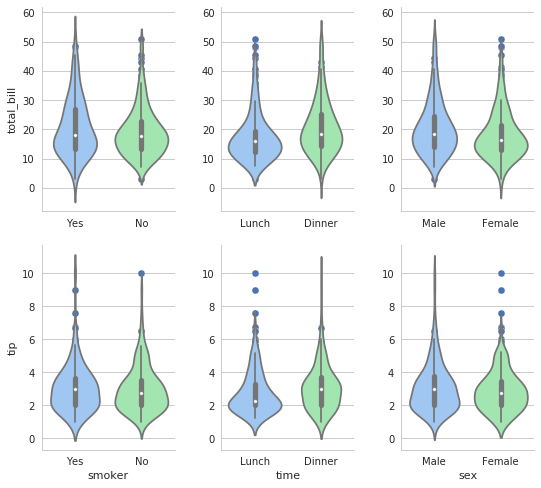

In [59]:
g = sns.pairplot(tips,
                 x_vars=["smoker", "time", "sex"],
                 y_vars=["total_bill", "tip"],
                 aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");

## 12. 观察线性关系 Visualizing linear relationships

许多数据集包含多个变量，分析的目标通常是分析这些变量相互关系。我们先前讨论了通过显示两个变量的联合分布来实现这个功能。不过，使用统计模型来估计两组有噪声的观测之间的简单关系很有用。通过线性回归可以方便的完成这个功能。

In [60]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))

### 12.1 绘制线性回归模型的方法 Functions to draw linear regression models

## Reference

[数据可视化入门（一）——用seaborn进行单变量分析](http://www.bijishequ.com/detail/543467)

[Python数据可视化模块—Seaborn](https://github.com/miaopei/Seaborn)

[ gengyabc blog ](http://wanwu.tech/)

[科学计算12 - Seaborn 入门](http://wanwu.tech/2018/02/28/Seaborn-basics/)

[科学计算13 - Seaborn 高级](http://wanwu.tech/2018/03/15/Seaborn-advanced/)

[MongoDB与Python](http://wanwu.tech/2017/03/31/mongodb-and-python/)

[科学计算6 - Scipy基本介绍](http://wanwu.tech/2018/02/10/scipy/)

[10分钟python图表绘制 | seaborn入门（一）：distplot与kdeplot](https://zhuanlan.zhihu.com/p/24464836)

[10分钟python图表绘制 | seaborn入门（二）：barplot与countplot](https://zhuanlan.zhihu.com/p/24553277)